In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('speed-dating.csv')

In [3]:
df.tail(20)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
8358,1,21,male,25.0,23.0,2,[2-3],european/caucasian-american,asian/pacific islander/asian-american,0,...,[0-3],[3-5],4.0,6.0,[0-5],[5-6],0.0,0,1,0
8359,1,21,male,25.0,NaN,25,[7-37],european/caucasian-american,european/caucasian-american,1,...,[0-3],[3-5],NaN,NaN,[0-5],[0-4],NaN,0,0,0
8360,1,21,male,25.0,23.0,2,[2-3],european/caucasian-american,european/caucasian-american,1,...,[0-3],[3-5],9.0,6.0,[9-10],[5-6],NaN,1,1,1
8361,1,21,male,25.0,23.0,2,[2-3],european/caucasian-american,european/caucasian-american,1,...,[0-3],[3-5],6.0,9.0,[6-8],[7-10],0.0,0,1,0
8362,1,21,male,25.0,23.0,2,[2-3],european/caucasian-american,european/caucasian-american,1,...,[0-3],[3-5],8.0,7.0,[6-8],[7-10],0.0,1,1,1
8363,1,21,male,25.0,27.0,2,[2-3],european/caucasian-american,asian/pacific islander/asian-american,0,...,[0-3],[3-5],8.0,6.0,[6-8],[5-6],0.0,1,1,1
8364,1,21,male,25.0,30.0,5,[4-6],european/caucasian-american,latino/hispanic american,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
8365,1,21,male,25.0,23.0,2,[2-3],european/caucasian-american,european/caucasian-american,1,...,[0-3],[3-5],6.0,7.0,[6-8],[7-10],0.0,0,1,0
8366,1,21,male,25.0,26.0,1,[0-1],european/caucasian-american,european/caucasian-american,1,...,[0-3],[3-5],6.0,4.0,[6-8],[0-4],0.0,0,0,0
8367,1,21,male,25.0,28.0,3,[2-3],european/caucasian-american,other,0,...,[0-3],[3-5],5.0,5.0,[0-5],[5-6],0.0,0,0,0


In [4]:
df.columns.tolist()

['has_null',
 'wave',
 'gender',
 'age',
 'age_o',
 'd_age',
 'd_d_age',
 'race',
 'race_o',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 'd_importance_same_race',
 'd_importance_same_religion',
 'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'd_pref_o_attractive',
 'd_pref_o_sincere',
 'd_pref_o_intelligence',
 'd_pref_o_funny',
 'd_pref_o_ambitious',
 'd_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'd_attractive_o',
 'd_sinsere_o',
 'd_intelligence_o',
 'd_funny_o',
 'd_ambitous_o',
 'd_shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 'd_attractive_important',
 'd_sincere_important',
 'd_intellicence_important',
 'd_funny_important',
 'd_ambtition_important',
 'd_share

There are a total of 123 columns. The last three columns tell us whether the date was successful or not, with the "match" column ultimately being the final decision. 

For curiousity, how many successful dates were there from this study? How many participants were involved in this study? This will be very difficult to answer, as I wish there was a unique identifier given for each participant in the study. The best way we can create a column called "unique identifer" that would combine the data in the columns of "wave" and "age" and "gender" into one. To do that, we can use an aggregate function to combine whats in each of those columns into a new column. We need to make sure they have the same data type though.

In [5]:
df.dtypes['wave']

dtype('int64')

In [6]:
df.dtypes['age']

dtype('float64')

In [7]:
df.dtypes['gender']

dtype('O')

In [9]:
df['wave'] = df['wave'].astype('str') 
df['age'] = df['age'].astype('str')
df['unique identifier'] = df[['wave', 'age', 'gender']].agg(' '.join, axis=1)

In [10]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,unique identifier
0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,...,[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0,1 21.0 female
1,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,...,[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0,1 21.0 female
2,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,...,[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1,1 21.0 female
3,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,...,[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1,1 21.0 female
4,0,1,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,latino/hispanic american,0,...,[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1,1 21.0 female


Again there is no unique identifier for the people in each row, other than their age. In this case, we are going to just have to assume that in each wave in the age column, the rows with the same age under the "age" column are considered to be the same person. If we then want to know the number of particpants using this method, what we can do is to show all unique values in the "unique identifier" column that we just created. Let's do this by scanning through each wave in the dataframe and removing all duplicates in the unique identifier column.

In [12]:
df['wave'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21'], dtype=object)

In [13]:
for i in df['wave'].unique():
    df[df['wave']==i] = df[df['wave']==i].drop_duplicates('unique identifier')

In [14]:
df['wave'].value_counts(ascending=True).head(5)

18     8
5      9
16     9
6     10
20    10
Name: wave, dtype: int64

In [15]:
df['unique identifier'].value_counts()

1 21.0 female    1
13 nan male      1
14 24.0 male     1
14 27.0 male     1
14 23.0 male     1
                ..
8 22.0 female    1
8 28.0 female    1
8 23.0 female    1
8 29.0 female    1
21 27.0 male     1
Name: unique identifier, Length: 324, dtype: int64

There are a total of 324 users who participated in this survey. Again, this is only under the assumption we made. Let's learn more about the participants; what is the gender ratio of those who participated?

In [16]:
df['gender'].value_counts()

male      163
female    161
Name: gender, dtype: int64

Let's learn a little bit more about the partipants in this study and study the columns of each. Before moving on, we have a decision to make here. We can either continue with the assumption and and stick with a dataframe containing only 324 rows, or we can stick with the normal dataframe. I am more focused on studying the percentages and ratios of attributes rather than numbers, and sticking with a normal dataframe will make things easier, so lets continue with using the normal dataframe. The only downside of this is that there will be user duplicates (since the dataframe keeps track of the dates that occured and not the number of particpants that participated), but I am also assuming that each particpant went on the same number of dates, therefore avoiding any bias at the end.

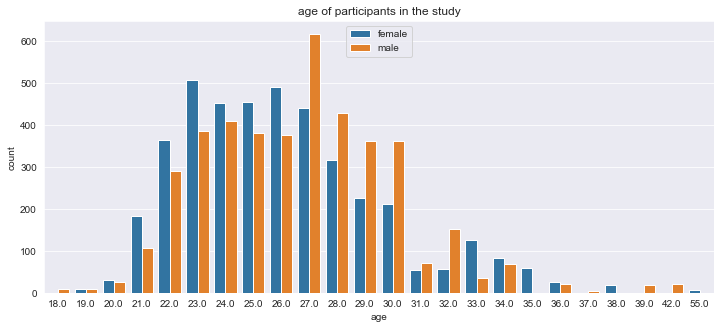

In [21]:
plt.figure(figsize = (12,5))
sns.countplot(x='age', hue = 'gender', data = df, order=np.unique(df['age'].dropna()))
plt.title('age of participants in the study')
plt.gca().yaxis.grid(True)
plt.legend()
plt.ylabel('count')
sns.set_style("darkgrid")

In [13]:
df['age'] = df['age'].astype('float64')

[Text(0, 0, '26.1059'), Text(0, 0, '26.6093')]

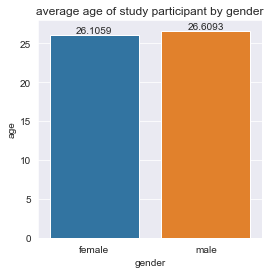

In [14]:
plt.figure(figsize = (4,4))
plt.title('average age of study participant by gender')
ax = sns.barplot(x='gender',y='age',data=df, ci=None)
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'distrbution of study participants by age')

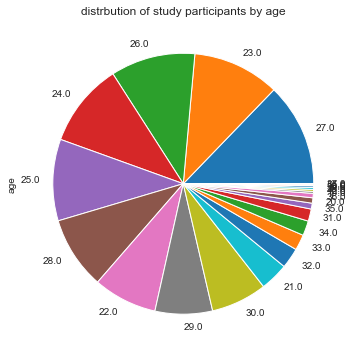

In [15]:
df['age'].value_counts(normalize=True).plot.pie(figsize = (6,6))
plt.title('distrbution of study participants by age')

Almost 75% of all the participants in the study are in their 20s. We also see from the barplot that the average age of a female participant is higher than that of a male, although in the age 20-30 range in the age histogram, the age is skewed more towards the male. This means that we expect to see more successful matches where the male is older than the female than vice versa. We'll see if this is true later in this study. What is the race distribution of all the participants in the study?

Text(0.5, 1.0, 'distrbution of study participants by race')

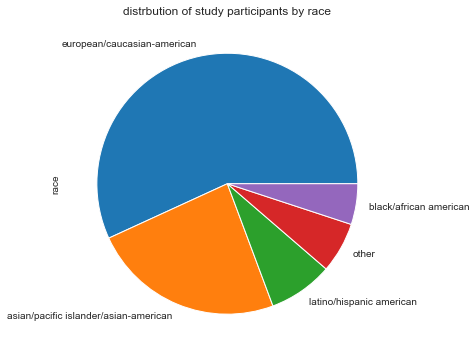

In [22]:
df['race'].value_counts(normalize=True).plot.pie(figsize = (6,6))
plt.title('distrbution of study participants by race')

More than 50% of all participants are caucasian-American, while about 25% are Asian, and the rest are other races. 

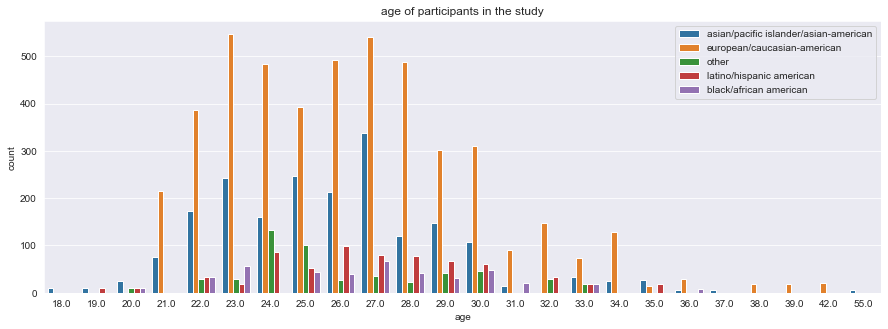

In [23]:
plt.figure(figsize = (15,5))
sns.countplot(x='age', hue = 'race', data = df, order=np.unique(df['age'].dropna()))
plt.title('age of participants in the study')
plt.legend(loc = 'upper right')
plt.ylabel('count')
sns.set_style("darkgrid")

While bringing up race, a question comes to mind; how does race influence a date? Do 2 people with the same race make it more likely for the date to be successful? If so, by how much, compared to 2 people of a different race? We modified the original dataframe, so let's bring it back to how it was in the beginning, sticking to the assumption we made earlier. 

In [24]:
df = pd.read_csv('speed-dating.csv')

To answer this question, let's focus on just two columns; "same race" and "match". Compare the rows where the race is the same vs. when it is not and see if there is a successful match or not for each condition. We can create a barplot out of this, but to do that, we must first filter out dates with same race from dates with different races, and from there convert the ratio of successful matches to non-successful matches into percentages, and store those percentages in table form.

In [38]:
df[df['samerace']==0]['match'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,index,percent
0,0,83.919399
1,1,16.080601


For curiousity, Above is the result of NOT adding the groupby('samerace')

In [25]:
df[df['samerace']==0].groupby('samerace')['match'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

,samerace,match,percent
0,0,0,83.919399
1,0,1,16.080601


Above is the result of adding the groupby('samerace'). Notice the difference between the 2 output tables.

Text(0.5, 19.80000000000002, "['Not a match', 'match']")

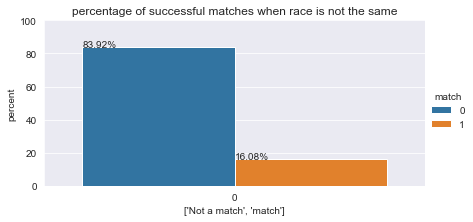

In [26]:
df1 = df[df['samerace']==0].groupby('samerace')['match'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
       
g = sns.catplot(x='samerace', y='percent', height = 3, aspect = 2, hue= 'match', kind='bar', data = df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('percentage of successful matches when race is not the same')
plt.xlabel(['Not a match', 'match'])

Text(0.5, 19.80000000000002, "['Not a match', 'match']")

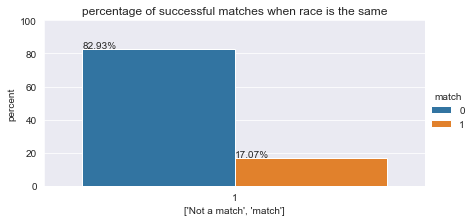

In [27]:
df1 = df[df['samerace']==1].groupby('samerace')['match'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
       
g = sns.catplot(x='samerace', y='percent', height = 3, aspect = 2, hue='match',kind='bar', data = df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('percentage of successful matches when race is the same')
plt.xlabel(['Not a match', 'match'])

If the participants on the date are the same race, the chances of having a sucessful match are slighter lower than if they weren't, but the difference isn't much higher; it is only 1%.

What about age difference? Is there a correlation between the age difference and the likeihood of having a successful match? We can answer this question by creating a bar graph with the x-axis as the age difference among dates and the y-axis showing the frequency of un-successful vs successful dates. 

Text(0, 0.5, 'count of matches vs non-matches')

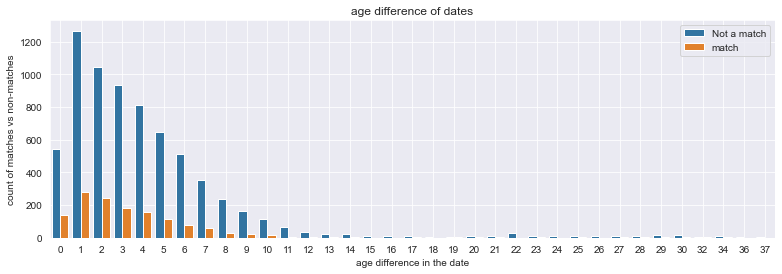

In [28]:
plt.figure(figsize = (13,4))
plt.grid()
sns.countplot(x='d_age', hue = 'match', data = df, order=np.unique(df['d_age'].dropna()))
plt.grid()
plt.title('age difference of dates')
plt.legend(['Not a match', 'match'], loc = 'upper right')
plt.xlabel('age difference in the date')
plt.ylabel('count of matches vs non-matches')

We need to determine the ratio between the frequency of dates not being a match vs. dates being a match per age difference category. Can we graph this by percentage distribution then? Let's only look at the age differences of 10 or less, as those categories have decent sample sizes.

(0.0, 120.0)

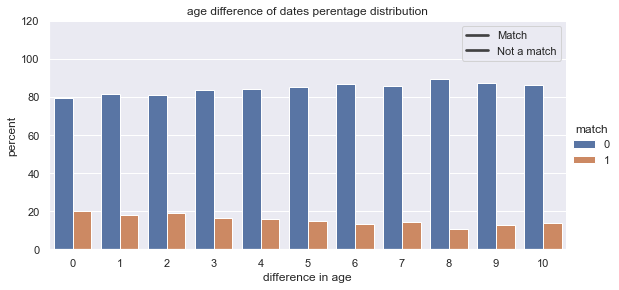

In [52]:
sns.set(color_codes=True)
(df[df['d_age']<=10].groupby('d_age')['match'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x= 'd_age', y='percent', height = 4, aspect = 2, hue='match',kind='bar', legend = 'auto'))
plt.title('age difference of dates perentage distribution')
plt.xlabel('difference in age')
plt.legend(['Match','Not a match'], loc = 'upper right')
plt.ylim(0,120)

We see here that as the age difference between a male and a female increases, the chances of having a successful match actually decreases. Can we look at this further and analyze the age difference again, but this time when the female is older than the male and then vice versa? To do this, let's create another column that dictates if the female is older than the male in the date or not.

In [53]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,0,1,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,latino/hispanic american,0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


In [55]:
df['female older?'] = df['d_age']
for i in np.linspace(0 , len(df['d_age'])-1 , len(df['d_age'])):
    i = i.astype(int)
    if (df['age_o'].iloc[i] > df['age'].iloc[i]) & (df['gender'].iloc[i] == 'female') or (df['age_o'].iloc[i] < df['age'].iloc[i]) & (df['gender'].iloc[i] == 'male'):
        df['female older?'].iloc[i] = 'no'
    elif (df['age_o'].iloc[i] < df['age'].iloc[i]) & (df['gender'].iloc[i] == 'female') or (df['age_o'].iloc[i] > df['age'].iloc[i]) & (df['gender'].iloc[i] == 'male'):
        df['female older?'].iloc[i] = 'yes'
    else:
        df['female older?'].iloc[i] = 'tie'
df.head()

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female older?
0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,...,[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0,no
1,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,...,[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0,no
2,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,...,[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1,no
3,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,...,[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1,no
4,0,1,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,latino/hispanic american,0,...,[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1,no


Text(0, 0.5, 'count of matches vs non-matches')

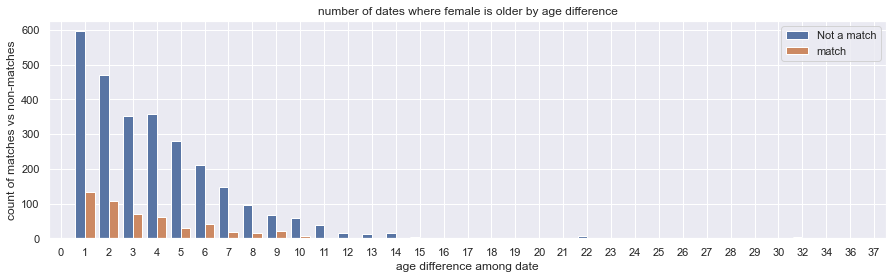

In [56]:
plt.figure(figsize = (15,4))
plt.grid()
sns.countplot(x=df[df['female older?']=='yes']['d_age'], hue = 'match', data = df, order=np.unique(df['d_age'].dropna()))
plt.grid()
plt.title('number of dates where female is older by age difference')
plt.legend(['Not a match', 'match'], loc = 'upper right')
plt.xlabel('age difference among date')
plt.ylabel('count of matches vs non-matches')

Text(0, 0.5, 'count of matches vs non-matches')

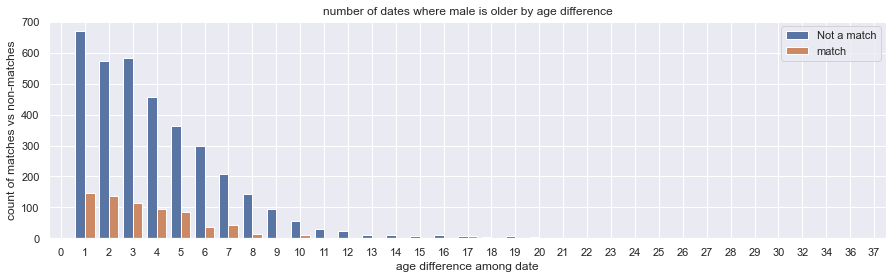

In [57]:
plt.figure(figsize = (15,4))
plt.grid()
sns.countplot(x=df[df['female older?']=='no']['d_age'], hue = 'match', data = df, order=np.unique(df['d_age'].dropna()))
plt.grid()
plt.title('number of dates where male is older by age difference')
plt.legend(['Not a match', 'match'], loc = 'upper right')
plt.xlabel('age difference among date')
plt.ylabel('count of matches vs non-matches')

Text(0.5, 22.960000000000008, 'age difference among date')

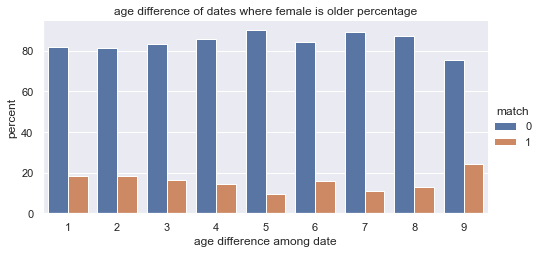

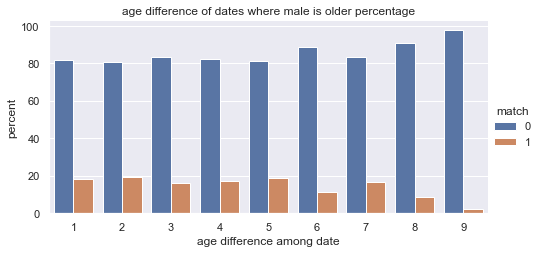

In [58]:
sns.set(color_codes=True)

### sns.set(color_codes=True)
(df[(df['female older?']=='yes') & (df['d_age']<=9)].groupby('d_age')['match'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x= 'd_age', y='percent', height = 3.5, aspect = 2, hue='match',kind='bar'))
plt.title('age difference of dates where female is older percentage')
plt.xlabel('age difference among date')

(df[(df['female older?']=='no') & (df['d_age']<=9)].groupby('d_age')['match'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x= 'd_age', y='percent', height = 3.5, aspect = 2, hue='match',kind='bar'))
plt.title('age difference of dates where male is older percentage')
plt.xlabel('age difference among date')

What do we see from here? We see that in both scenarios, when the age difference increases, the chances of having a successful date decreases. For dates when the female is older, the trend starts as soon as the age difference surpasses 1. For dates when the male is older, the trend is imminenent when the age difference is at 7. 

What about in dates when there is no age difference between the male and the female?

Text(0.5, 22.960000000000008, "['Not a match', 'match']")

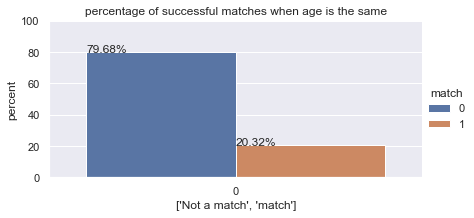

In [59]:
#sns.set(color_codes=True)
df1 = df[(df['female older?']=='tie') & (df['d_age']<=9)].groupby('d_age')['match'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='d_age', y='percent', height = 3, aspect = 2, hue='match',kind='bar', data = df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('percentage of successful matches when age is the same')
plt.xlabel(['Not a match', 'match'])

With a chance of not having a successful date being around 80%, this number is not too different from what we've seen with the other age differences. 

We've tried attributes such as age and race, to see if dates having the same type of attribute results in the best chances of having a successful date, but the results have remained similar to each other. Can we build a model that instantly computes the chances of a successful date through analyzing every single attribute?

In addition to attributes, each person also had to rate the importance of characteristics such as attractiveness, sincereness, etc. Could we use this information to predict if a date will turn out well or not? Let's use supervised Machine Learning!

Before applying machine learning, obivously you can't just use all the columns in the dataframe and run it through machine learning immediately; you need to figure out which columns are potentially useful.